In [1]:
using DifferentialEquations
using Plots


Řešíme úlohu 
\begin{equation}
-\Delta_p u =\lambda |u|^{p-2}u, \; t \in (0,1)\\
u(0)=u(1)=0
\end{equation}
kde $\Delta_p u := \left(|u'|^{p-2}u' \right)'$.

Postup pro řešení pomocí shooting method:
- převedu si na soustavu (tohle je pro úlohu $-u''=\lambda u$):
\begin{equation}
u_1' = u_2\\
u_2' = - \lambda u_1
\end{equation}
- tu řeším jako IVP s levou okrajovou podmínkou a nějakým pevným \lambda
- bisekcí měním \lambda až se napravo dostanu kam potřebuju (=0)


Já budu ale chtít řešit tuhle soustavu:

\begin{equation}
u_1' = |u_2|^{\frac{p}{p-1}-2} u_2\\
u_2' = -\lambda |u_1|^{p-2}u_1
\end{equation}

Přesná hodnota prvního vlastního čísla je:

$$\lambda_1 = (p-1)\left( \frac{2\frac{\pi/p}{\sin{\pi/p}}}{b-a} \right)^p$$




---

Zatím to vypadá, že řešení IVP v Julii funguje jen pro P>=2 (případ P=2 nás ale vlastně nezajímá). Zjistit, proš nefunguje řešení pro 1<P<2

In [20]:
# nastavení p a přesná hodnota λ₁
P=3

λ1 = (P-1)*(2*(π/P)/(sin(π/P)))^P

28.28876197600255

První vlastní číslo λ₁: 28.332324714358997


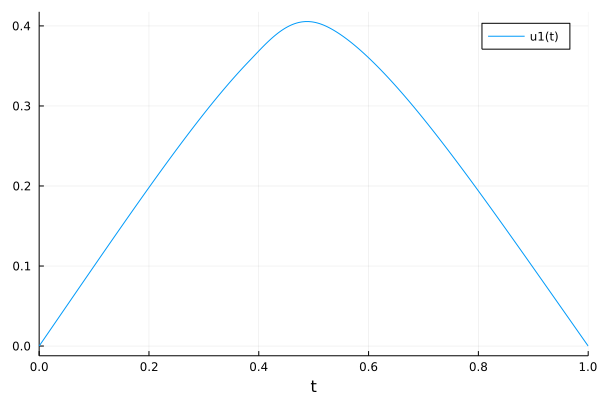

In [21]:
# řešení diferenciální soustavy metodou střelby

function sl(du,u,p,t) # parametr p je odhad na λ₁ a p z p-laplacianu
    λ, r = p
    du[1] = abs(u[2])^(r/(r-1) - 2)*u[2]
	du[2] = -λ * abs(u[1])^(r-2)*u[1]
end

u0 = [0.0; 1.0;] # počáteční podmínka

e = 1e-12 # zastavovací podmínka
a,b = (3.,40.)
s = (a + b)/2

while (b-a) >= e
    prob = ODEProblem(sl, u0, (0.0, 1.0), (s, P))
    sol = solve(prob)

    if sol(1)[1] == 0 # bere hodnotu v t=1 (pravej konec) pro první řešení soustavy u₁
        break
    else
        probA = ODEProblem(sl, u0, (0.0, 1.0), (a, P))
        solA = solve(probA)
        
        probS = ODEProblem(sl, u0, (0.0, 1.0), (s, P))
        solS = solve(probS)

        if solA(1)[1] * solS(1)[1] < 0
            b = s
        else
            a = s
        end
        s = (a+b)/2
    end
end
    
prob = ODEProblem(sl, u0, (0.0, 1.0), (s, P))
sol = solve(prob)

println("První vlastní číslo λ₁: $s")
plot(sol,vars=(0,1))

První vlastní číslo λ₁: 9.869545326538542


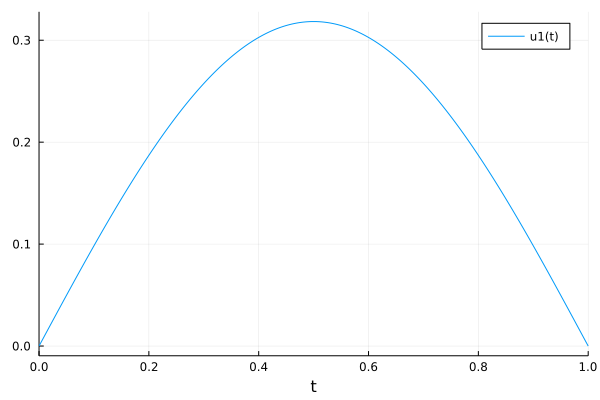

In [22]:
################
# pro S-L úlohu
###############
# řešení diferenciální soustavy
function sl(du,u,p,t) # parametr p je odhad na λ₁
	du[1] = u[2]
	du[2] = -p * u[1]
end

u0 = [0.0; 1.0;] # počáteční podmínka

e = 1e-12 # zastavovací podmínka
a,b = (3.,20.)
s = (a + b)/2

while (b-a) >= e
    prob = ODEProblem(sl, u0, (0.0, 1.0), s)
    sol = solve(prob)

    if sol(1)[1] == 0 # bere hodnotu v t=1 (pravej konec) pro první řešení soustavy u₁
        break
    else
        probA = ODEProblem(sl, u0, (0.0, 1.0), a)
        solA = solve(probA)
        
        probS = ODEProblem(sl, u0, (0.0, 1.0), s)
        solS = solve(probS)

        if solA(1)[1] * solS(1)[1] < 0
            b = s
        else
            a = s
        end
        s = (a+b)/2
    end
end
    
prob = ODEProblem(sl, u0, (0.0, 1.0), s)
sol = solve(prob)

println("První vlastní číslo λ₁: $s")
plot(sol,vars=(0,1))